# Web Scraping for future Data Scientists

A l’època en què l’aprenentatge automàtic i el *big data* poden crear o enfonsar una empresa, hi ha un recurs més valuós que qualsevol altre: **les dades**.

Malauradament, és difícil aconseguir les dades contextualitzades i estructurades que sovint necessiten les empreses.

Però hi ha una solució: **web scraping**.

Web scraping és l’API universal, que permet utilitzar les dades disponibles públicament per als vostres interesos.

## Què és l'*Scraping*?

*Web scraping* és el procés d’extracció de dades d’un lloc web.

Si alguna vegada heu copiat informació d'un lloc web i l'heu enganxat en un full de càlcul d'Excel o en un document de Word, tècnicament esteu fent *scraping*.

Haver de copiar i enganxar repetidament dades d’un lloc web a un full de càlcul d’Excel és avorrit. Fer *scraping* automatitzat tot el procés, fent que sigui més "fàcil" i ràpid.

## Per a què es pot fer servir el *web scraping*?

Un extractor de dades en mans d’un desenvolupador experimentat i imaginatiu és una eina única.

Podeu programar una API per automatitzar tota mena d’escenaris. Qualsevol contingut que vegeu a una pàgina web es pot extreure si teniu prou recursos. 

Un cop tingueu les dades, podreu utilitzar-les a les vostres aplicacions per proporcionar un avantatge al vostre negoci, per controlar la vostra reputació en línia o simplement per simplificar la vostra vida.

Avui en dia, l'*scapring* s’utilitza en tot, comerç electrònic, llocs web de comparació de preus, generació de contactes o agregació de contingut.

Amb el progrés en l'aprenentatge automàtic i la intel·ligència artificial, l'extracció de dades web ha guanyat importància. 

Aquestes APIs són úniques, ja que poden proporcionar algunes de les dades més importants per classificar i crear algoritmes predictius.


## El teu primer *Scraping*

Per tal de poder executar tot el codi d'aquest notebook, és necessari que instal·leu les següents llibreries:

````python
#Beautiful Soup is a library that makes it easy to scrape information from web pages
!pip install beautifulsoup4 or !pip3 install beautifulsoup4

#Requests is an elegant and simple HTTP library for Python
!pip install requests or !pip3 install requests

# GeoPandas is an open source project to make working with geospatial data in python easier
!pip install geopandas or !pip3 install geopandas

# contextily is a small Python 3 package to retrieve tile maps from the internet
!pip install contextily or !pip3 install contextily

# The descartes library provides a nicer integration of Shapely geometry objects with Matplotlib.
!pip install descartes or !pip3 install descartes

````

In [1]:
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np 
import requests
from tqdm import tqdm_notebook

In [2]:
url = 'https://tnui-ub.github.io/scraping/'

Per entendre com funciona farem *scraping* de la següent web:

<img src="images/github.png" width="500"/>

## 1. Fer una còpia de la web:

Per tal de fer *scraping* sobre la web *url*, cal **fer una còpia** d'aquesta. 

Però, què cal copiar? Què és realment una web?

(Botó dret *inspeccionar*)

<img src="images/inspeccionar.png" width="500"/>

In [3]:
def get_page(url):
    """
    Retorna un objecte Soup amb la web que s'ha passat pel parametre url
    """
        
    # Guardem la pagina i la guardem en la variable content
    query = requests.get(url)
    content = query.content

    #Beautiful Soup is an HTML/XML parser for Python that can turn even invalid markup into a parse tree
    page = BeautifulSoup(content, features='lxml')
    return page

page = get_page(url)

Us convido a comparar les variables *content* i *page*.

## 2. Buscar informació dintre de la web:

El següent pas és trobar aquella informació que ens interessa.

Per assolir aquest objectiu farem servir la funció *find* de l'objecte *BeautifulSoup*.

En el primer exemple voldrem copiar el títol... però com ho fem?

<img src="images/title.png" width="900"/>

In [4]:
# Títol de la pàgina web
page.find('h1').text

'My first web scraping'

Compliquem una mica la informació que volem agafar...

Ara volem agafar el títol de l'assignatura (lateral esquerra).

<img src="images/subject.png" width="900"/>

In [5]:
# Titol de l'assignatura
page.find('div', {'class':'side'}).find('h2').text

'Taller de Nous Usos de la Informàtica (2020-2021)'

Ara ja sabem com buscar elements en diferents parts de la pàgina web.

Però per poder fer cerques automàtiques, ens cal saber trobar els nous enllaços.

En la següent cel·la agafarem tots els hipervincles (enllaços a altres pàgines) i el nom que tenen assignats.

Recordatori de les etiquetes bàsiques: https://es.wikipedia.org/wiki/HTML#Etiquetas_HTML_b%C3%A1sicas

In [6]:
# Enllaços i noms
[(elem.text, elem['href']) for elem in page.find_all('a')]

[('Home', 'https://tnui-ub.github.io/scraping/'),
 ('CampusVirtual', 'https://campusvirtual.ub.edu/'),
 ('GitHub', 'https://github.com/TNUI-UB'),
 ('Google', 'https://www.google.es/')]

## Let's code! 

Aneu veient com funciona? Fàcil?

Anem a veure què sou capaços de fer!

1. Títols amb les entrades del blog.
2. Títol i contingut de l'entrada
3. Peu de pàgina

In [7]:
# Títols de les entrades al blog
[elem.text for elem in page.find('div', {'class':'main'}).find_all('h2')]

['Wednesday class', 'Thursday class']

In [8]:
# Títol i contingut de cada entrada
[(title.text, description.text)
 for title, description in zip(page.find('div', {'class':'main'}).find_all('h2'), page.find('div', {'class':'main'}).find_all('p'))]

[('Wednesday class',
  'Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may access the World Wide Web directly using the Hypertext Transfer Protocol, or through a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.'),
 ('Thursday class',
  'There are methods that some websites use to prevent web scraping, such as detecting and disallowing bots from crawling (viewing) their pages. In response, there are web scraping systems that rely on using techniques in DOM parsing, computer vision and natural language processing to simulate human browsing to enable gathering web page content for offline parsing.')]

In [9]:
# Are you an expert?
page.find('div', {'class': 'footer'}).find('h2').text

'Now you are an expert!'

Ara que ja sabem fer *scraping* en una web... podem extreure informació d'interès? 

A qui no li agrada viatjar?


# Airbnb


*Airbnb allows people to rent out their properties on the platform of Airbnb. Travelers can then book these properties for shorter or longer periods of time. The company was founded in August 2008 in San Francisco, California, and currently has an annual revenue stream of over 2.5 Billion US Dollars [1]. In the US alone the platform has 660,000 listings [2]. Every individual listing contains a lot of information like the facilities offered, the location, information about the host, and reviews.*

Suposem que ja tenim un destí, **Barcelona**, els dies que volem anar, de **2020-12-01 a 2020-12-10** i quantes persones, **6**. 

In [11]:
people = 6
data_in = '2020-12-01'
data_out = '2020-12-10'

airbnb_url = 'https://www.airbnb.es/s/Barcelona--Espa%C3%B1a/homes?adults={}&place_id=ChIJZb1_yQvmpBIRsMmjIeD6AAM&refinement_paths%5B%5D=%2Fhomes&checkin={}&checkout={}'.format(people, data_in, data_out)

<img src="images/airbnb-bcn.png" width="900"/>

Abans hem vist com agafar una web.

Els passos que ens cal implementar a continuació són:

1. Obtenir la informació d'un apartament.
2. Obtenir tots els apartaments d'una pàgina.
3. Obtenir totes les pàgines on hi ha apartaments.

In [12]:
page = get_page(airbnb_url)

És important saber què volem i on està per trobar la seva localització a la web.

<img src="images/airbnb-inspeccionar.png" width="1100"/>

In [13]:
def get_next_apartment(page):
    """
    Generador on cada element que torna és la informació d'un apartament
    """
    query = page.findAll("div", {"class": "_8ssblpx"})

    for q in tqdm_notebook(query):
        yield {
            'titles' : q.find("meta")["content"],
            'links' : "http://airbnb.com" + q.find("a")["href"],
            'toprows' : q.find("div", {"class": "_167qordg"}).text,
            'roominfos' : q.find("div", {"class":"_kqh46o"}).text,
            'basicfacilitiess' : q.findAll("div", {"class":"_kqh46o"})[1].text.replace(" ",""),
            'prices' : q.find("div", {"class":"_1fwiw8gv"}).text,
            'ratings' : q.find("span", {"class":"_krjbj"}).text,
            'reviews' : q.findAll("span", {"class":"_krjbj"})[1].text,
        }

In [14]:
pd.DataFrame(get_next_apartment(page))

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


,basicfacilitiess,links,prices,ratings,reviews,roominfos,titles,toprows
0,Lavavajillas·Lavadora·Aireacondicionado·Cocina,http://airbnb.com/rooms/12506292?adults=6&chec...,Precio anterior:72€Precio con descuento:67€ po...,Valoración 4.55 de 5;,156 evaluaciones,6 huéspedes · 3 dormitorios · 5 camas · 2 baños,Moderno piso de 3 habitaciones en el centro - ...,Apartamento entero en Barcelona
1,Lavadora·Aireacondicionado·Cocina·Ascensor,http://airbnb.com/rooms/14977487?adults=6&chec...,Precio anterior:63€Precio con descuento:52€ po...,Valoración 4.88 de 5;,259 evaluaciones,6 huéspedes · 3 dormitorios · 5 camas · 2 baños,Acogedor a 10 km Centro Barcelona - null - San...,Apartamento entero en Sant Just Desvern
2,Lavavajillas·Lavadora·Aireacondicionado·Cocina,http://airbnb.com/rooms/3144104?adults=6&check...,Precio anterior:77€Precio con descuento:70€ po...,Valoración 4.86 de 5;,472 evaluaciones,6 huéspedes · 3 dormitorios · 4 camas · 1 baño,Luxury / Cozy Apartment in the city center - n...,Apartamento entero en Barcelona
3,Lavavajillas·Lavadora·Aireacondicionado·Cocina,http://airbnb.com/rooms/17726717?adults=6&chec...,Precio anterior:132€Precio con descuento:80€ p...,Valoración 4.25 de 5;,84 evaluaciones,6 huéspedes · 6 dormitorios · 9 camas · 2 baños,AB Paral·lel Apartment - Ref. GI1917 - null - ...,Apartamento entero en BARCELONA
4,Tuanfitriónesunaempresa·Lavavajillas·Lavadora·...,http://airbnb.com/rooms/43861096?adults=6&chec...,Precio anterior:142€Precio con descuento:77€ p...,Valoración 4.80 de 5;,5 evaluaciones,6 huéspedes · 3 dormitorios · 3 camas · 1 baño,"New, modern & cozy apartment with free parking...",Apartamento entero en L'Hospitalet de Llobregat
5,Lavadora·Cocina·Wifi,http://airbnb.com/rooms/30365974?adults=6&chec...,Precio anterior:85€Precio con descuento:80€ po...,Valoración 4.17 de 5;,30 evaluaciones,"6 huéspedes · 4 dormitorios · 4 camas · 1,5 baños","Luxurious decor 4BDR Apt in central, Eixample ...",Apartamento entero en Barcelona
6,Lavavajillas·Lavadora·Aireacondicionado·Cocina,http://airbnb.com/rooms/16057576?adults=6&chec...,Precio:70€ por noche,Valoración 4.32 de 5;,95 evaluaciones,6 huéspedes · 3 dormitorios · 5 camas · 2 baños,"Modern bright apartment, with huge terrace ! -...",Apartamento entero en Barcelona
7,Tuanfitriónesunaempresa·Lavavajillas·Lavadora·...,http://airbnb.com/rooms/21390934?adults=6&chec...,Precio anterior:103€Precio con descuento:87€ p...,Valoración 4.73 de 5;,74 evaluaciones,8 huéspedes · 4 dormitorios · 6 camas · 2 baños,APARTAMENTO SUPERIOR DE 4 DORMITORIOS - null -...,Apartamento entero en Barcelona
8,Tuanfitriónesunaempresa·Lavavajillas·Lavadora·...,http://airbnb.com/rooms/plus/26741961?adults=6...,Precio:90€ por noche,Valoración 4.85 de 5;,62 evaluaciones,8 huéspedes · 4 dormitorios · 5 camas · 2 baños,Laze in a Chic Apartment in Vila de Gracia - n...,Complejo residencial entero en Barcelona
9,Lavavajillas·Lavadora·Aireacondicionado·Cocina,http://airbnb.com/rooms/14021579?adults=6&chec...,Precio anterior:95€Precio con descuento:87€ po...,Valoración 4.52 de 5;,225 evaluaciones,7 huéspedes · 4 dormitorios · 5 camas · 2 baños,Comfortable 4 rooms 2Bath w balcony - null - B...,Apartamento entero en Barcelona


Ara tenim un dataframe amb els apartaments d'una pàgina, però encara ens queden la resta de resultats.

In [43]:
def get_next_page(soup):
    """
    Donat un objecte Soup, retorna la següent pàgina
    """
    
    query = page.find("li", {"class": "_i66xk8d"})
    
    if not query:
        return None

    query = query.find('a')['href']
    print('https://airbnb.com' + query)
    return get_page('https://airbnb.com' + query)
    

In [16]:
pd.DataFrame(get_next_apartment(get_next_page(page)))

https://airbnb.com/s/Barcelona--España/homes?checkin=2020-12-01&refinement_paths%5B%5D=%2Fhomes&adults=6&checkout=2020-12-10&tab_id=home_tab&place_id=ChIJZb1_yQvmpBIRsMmjIeD6AAM&federated_search_session_id=7749e9be-b62f-43ea-a46b-9c306c7aa27b&search_type=pagination&items_offset=20&section_offset=3


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


,basicfacilitiess,links,prices,ratings,reviews,roominfos,titles,toprows
0,Dishwasher·Washer·Airconditioning·Kitchen,http://airbnb.com/rooms/45560047?adults=6&chec...,Previous price:$143Discounted price:$119 / night,Previous price:,Discounted price:,8 guests · 3 bedrooms · 6 beds · 1.5 baths,Private Rooftop Penthouse at the Heart of Barc...,Entire apartment in Barcelona
1,Dishwasher·Washer·Airconditioning·Kitchen,http://airbnb.com/rooms/21390934?adults=6&chec...,Previous price:$120Discounted price:$101 / night,Rating 4.73 out of 5;,74 reviews,8 guests · 4 bedrooms · 6 beds · 2 baths,SUPERIOR 4 BEDROOM APARTMENT - null - Barcelona,Entire apartment in Barcelona
2,Hostedbyabusiness·Dishwasher·Washer·Airconditi...,http://airbnb.com/rooms/20486543?adults=6&chec...,Previous price:$109Discounted price:$91 / night,Rating 4.78 out of 5;,67 reviews,6 guests · 3 bedrooms · 4 beds · 2 baths,SPLENDID THREE BEDROOM APARTMENT - null - Barc...,Entire apartment in Barcelona
3,Dishwasher·Washer·Airconditioning·Kitchen,http://airbnb.com/rooms/9469705?adults=6&check...,Previous price:$104Discounted price:$96 / night,Rating 4.67 out of 5;,161 reviews,6 guests · 3 bedrooms · 4 beds · 2 baths,Luxurious 3 Bedroom Flat & Terrace in Sants - ...,Entire apartment in Barcelona
4,Dishwasher·Washer·Airconditioning·Kitchen,http://airbnb.com/rooms/42455373?adults=6&chec...,Previous price:$117Discounted price:$98 / night,Rating 5.0 out of 5;,35 reviews,7 guests · 4 bedrooms · 4 beds · 2 baths,"⭐ 12min centro Barcelona, 3min playa ⭐ - null ...",Entire apartment in Sant Adrià de Besòs
5,Dishwasher·Washer·Freeparking·Pool,http://airbnb.com/rooms/32769686?adults=6&chec...,Price:$145 / night,Rating 4.65 out of 5;,51 reviews,10 guests · 6 bedrooms · 7 beds · 3 baths,Gran Maison Barcelona - null - Vallirana,Entire house in Vallirana
6,Hostedbyabusiness·Dishwasher·Washer·Airconditi...,http://airbnb.com/rooms/19865313?adults=6&chec...,Previous price:$103Discounted price:$78 / night,Rating 4.15 out of 5;,20 reviews,7 guests · 3 bedrooms · 7 beds · 2 baths,AB Park Güell Apartment - Ref. GI2453 - null -...,Entire apartment in BARCELONA
7,Washer·Airconditioning·Kitchen·Dryer,http://airbnb.com/rooms/23202240?adults=6&chec...,Price:$69 / night,Price:,Price:,6 guests · 3 bedrooms · 5 beds · 1 bath,"Casa Luna, junto playa y Barcelona Centro. - n...",Entire house in Badalona
8,Dishwasher·Airconditioning·Kitchen·Elevator,http://airbnb.com/rooms/29675640?adults=6&chec...,Previous price:$75Discounted price:$70 / night,Rating 4.16 out of 5;,44 reviews,6 guests · 2 bedrooms · 3 beds · 1 bath,Welcoming 2 Bed with balcony in Gracia - null ...,Entire apartment in Barcelona
9,Hostedbyabusiness·Dishwasher·Washer·Indoorfire...,http://airbnb.com/rooms/19921689?adults=6&chec...,Price:$233 / night,Rating 4.82 out of 5;,22 reviews,14 guests · 7 bedrooms · 8 beds · 4 baths,"Catalunya Casas: Majestic Villa Fontpineda, 30...",Entire villa in Barcelona Region


Però podem utilitzar les dades tal com estan?

Tal com llegim les dades estan desendreçades, sense netejar i no es poden aplicar a cap algorisme directament (necessiten dades categòriques o valors).

Per aquest motiu, normalment el procés de fer *scraping* va seguit amb la neteja de dades. 

Aquest post-procesament el veureu a la pràctica 3.

# Visualització de les dades extretes

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import geopandas as gpd
import contextily as ctx

## Exploració de les dades

Com hem dit al llarg del curs, quan treballem amb dades, és molt important fer un anàlisis superficial per entendre que tenim.

Però de moment ja sabeu com fer *scraping* i anem a veure algunes visualitzacions amb les dades extretes.

In [18]:
df = pd.read_csv('data/clean_sraping.csv', index_col = 'Unnamed: 0')
df.shape

(23626, 16)

In [19]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.408886,2.185545,Entire home/apt,130,3,1,2015-10-10,0.03,29,61
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.404197,2.173058,Entire home/apt,110,1,4,2016-06-20,0.07,29,148
2,19157,"Great Place in Sagrada Familia, Bcn",73099,Urania,Eixample,la Sagrada Família,41.407929,2.174540,Private room,30,2,160,2018-05-18,1.68,2,69
3,20345,"2 Double rooms for 4 persons, WI-FI",76809,Mila,Nou Barris,Vilapicina i la Torre Llobeta,41.429497,2.181558,Private room,25,2,71,2018-05-03,0.73,1,335
4,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380768,2.175510,Private room,60,3,2,2017-11-06,0.15,2,0


A diferència dels dataframes que hem creat, tenim les dades de forma categòrica, les quals es poden utilitzar per treballar.

In [20]:
def count_column(df, column):
    """
    Funció que ens permet visualitzar les columnes categòriques
    """
    return df.groupby([column]).size()

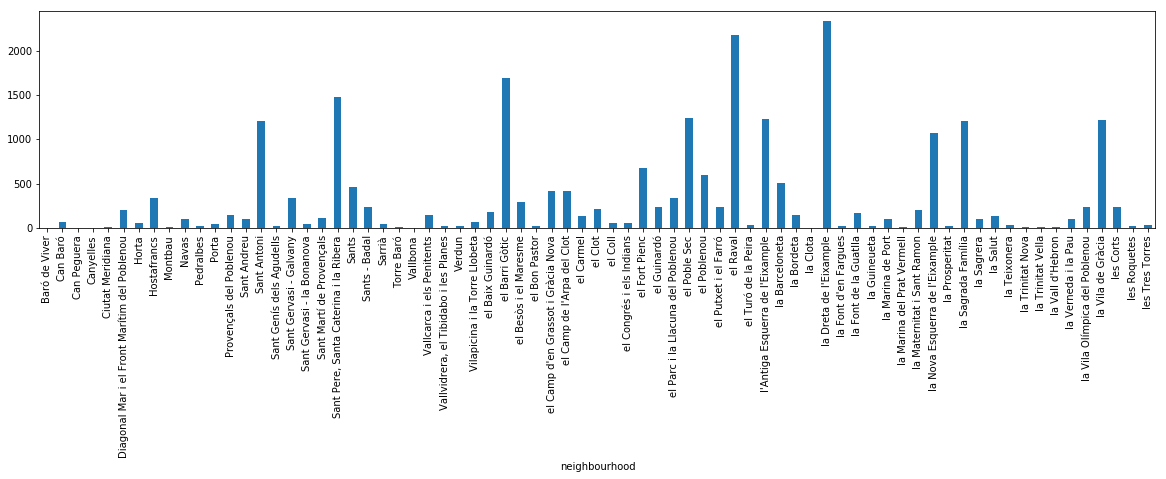

In [21]:
# Barris de Barcelona i la quantitat d'apartaments, hotels, habitacions disponibles

plt.figure(figsize = (20, 4))
count_column(df, 'neighbourhood').plot.bar()
plt.show()

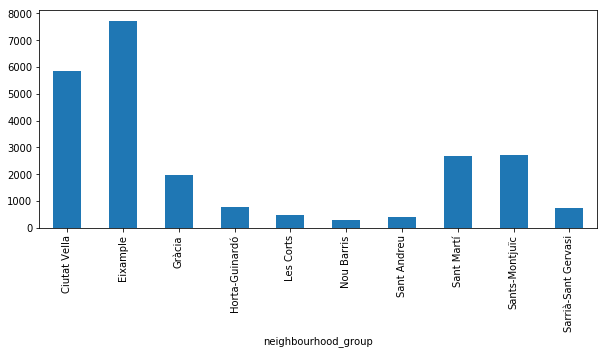

In [22]:
# Districtes de Barcelona i la quantitat d'apartaments, hotels, habitacions disponibles.
plt.figure(figsize = (10, 4))
count_column(df, 'neighbourhood_group').plot.bar()
plt.show()

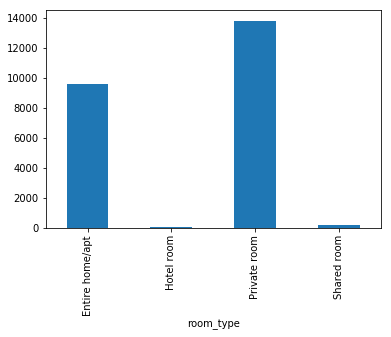

In [23]:
# Tipus de lloguers (Apartament, hotel, habitació)
count_column(df, 'room_type').plot.bar()
plt.show()

## Visualitzacions geogràfiques

Les visualitzacions que mostrarem a continuació estan relacionades amb la geoposició dels lloguers.

Per tal de dur a terme aquestes visualitzacions necessitem tenir un mapa de Barcelona.

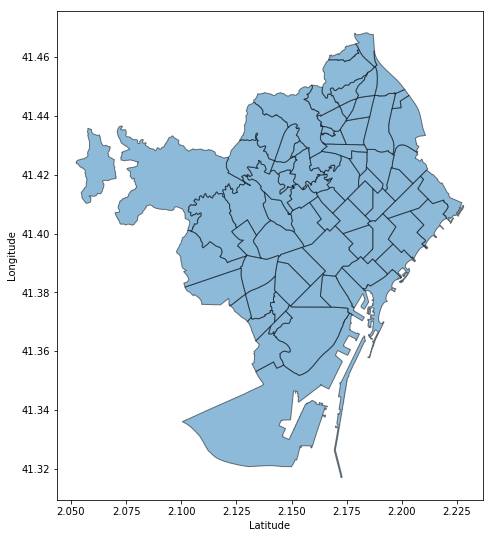

In [25]:
# Informació geogràfica dels barris de Barcelona 
barris = gpd.read_file("data/barris.geojson")

barris.plot(figsize=(9, 9), alpha=0.5, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Per tenir una idea de la distribució que segueixen, anem a visualitzar la localització de cada lloguer sobre el mapa de Barcelona.

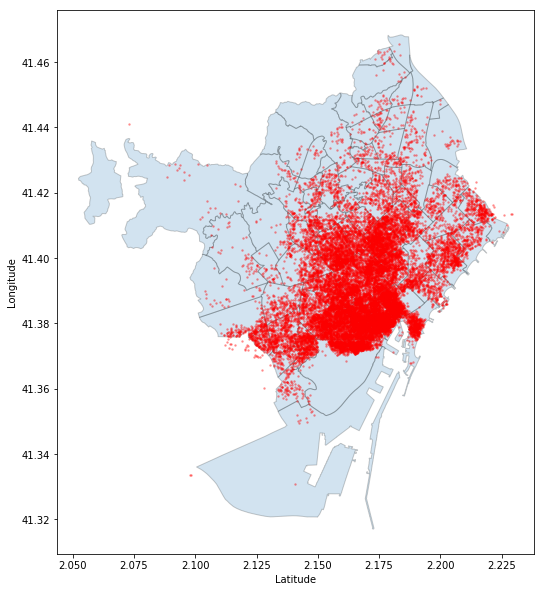

In [26]:
# Limitacions dels barris
barris.plot(figsize=(10, 10), alpha=0.2, edgecolor='black')

# Localització dels lloguers
plt.scatter(df['longitude'], df['latitude'], marker = 'o', color = 'red', s = 2.5, alpha = 0.3)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Tot i que ens dóna la informació que volem, la visualització la podem millorar.

I si afegim el mapa de Barcelona?

In [27]:
# Canvi del sistema de referència de coordenades perquè marxin els polígons dels dos mapes
barris = barris.to_crs(epsg=3857)

# Llegir el fitxer geojson que conté els districtes
dists = gpd.read_file("data/districtes.geojson")

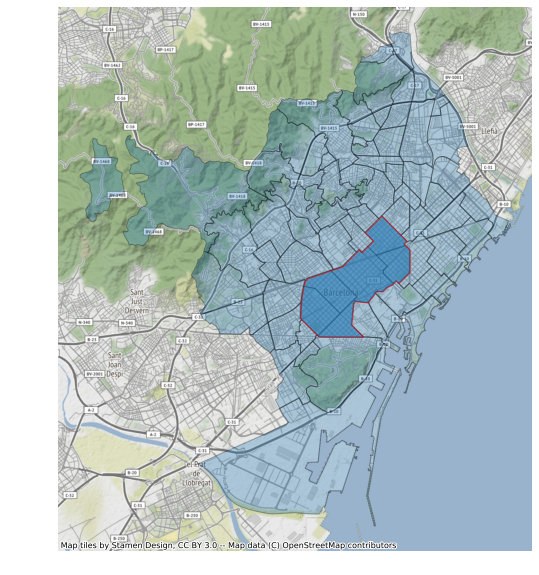

In [48]:
#Plot del mapa
axe = barris.plot(figsize=(10,10), alpha=0.3, edgecolor='black')
ctx.add_basemap(axe)

# Només per experimentar una mica, pintem un districte de color vermell.
dists1 = dists[dists['NOM']=='Eixample']
dists1 = dists1.to_crs(epsg=3857)

# Utilitzar els barris com a eix d’aquest mapa
dists1.plot(ax=axe, figsize=(10,10), alpha=0.6, edgecolor='r')

plt.axis('off')
plt.show()

## Let's code!

Per aprofitar aquesta visualització, calcularem els següents punts considerant només aquells lloguers que són "Entire home/apt".

1. Nombre total d'apartaments per barri
2. Densitat d'apartaments per barri
3. Preu mitjà dels apartaments de cada barri

In [29]:
# Filtrem el dataframe i ens quedem amb les files dels apartaments sencers
df_entire = df[df['room_type']=="Entire home/apt"]

In [30]:
# Comptem quants pisos hi ha per barri
df_entire_agg = df_entire.id.groupby(df_entire['neighbourhood']).count().reset_index()
df_entire_agg.columns = ['barri', 'quantitat']

df_entire_agg.head()

,barri,quantitat
0,Baró de Viver,1
1,Can Baró,27
2,Canyelles,1
3,Diagonal Mar i el Front Marítim del Poblenou,114
4,Horta,6


In [31]:
# Àrea dels diferents barris
area = barris[['NOM', 'AREA']].sort_values(by='NOM')
area.head()

,NOM,AREA
71,Baró de Viver,229892.748
20,Can Baró,384183.684
60,Can Peguera,118684.902
64,Canyelles,790101.386
68,Ciutat Meridiana,376683.246


In [32]:
area['AREA'].sum()

101696391.706

In [33]:
df_entire_merge = pd.merge(left = area, right = df_entire_agg, left_on='NOM', right_on='barri')[['barri', 'quantitat', 'AREA']]
df_entire_merge.head()

,barri,quantitat,AREA
0,Baró de Viver,1,229892.748
1,Can Baró,27,384183.684
2,Canyelles,1,790101.386
3,Diagonal Mar i el Front Marítim del Poblenou,114,1226952.565
4,Horta,6,3070018.014


In [34]:
# Densitat d'apartaments
df_entire_merge['densitat'] = df_entire_merge['quantitat'] / df_entire_merge['AREA']

In [35]:
# Creem el dataframe que utilitzarem per crear la visualització
neighbourhood = barris.copy()
neighbourhood = pd.merge(neighbourhood, df_entire_merge, left_on= 'NOM', right_on='barri')
neighbourhood.shape

(69, 51)

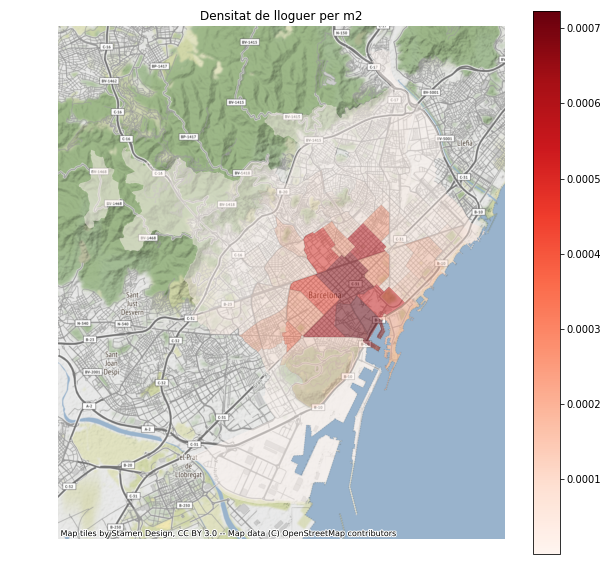

In [42]:
# Visualització densitat
axe = neighbourhood.plot(figsize=(10, 10), alpha=0.5, column='densitat', cmap='Reds', vmin=neighbourhood.densitat.min(), vmax=neighbourhood.densitat.max(), legend = True)
ctx.add_basemap(axe)
plt.title('Densitat de lloguer per m2')
plt.axis('off')
plt.show()

In [37]:
# Preu mig dels lloguers
df_preu_agg = df_entire.groupby('neighbourhood')['price'].mean().reset_index()
df_preu_agg.columns = ['barri', 'preu']

In [38]:
df_preu_agg.head()

,barri,preu
0,Baró de Viver,25.000000
1,Can Baró,103.777778
2,Canyelles,76.000000
3,Diagonal Mar i el Front Marítim del Poblenou,265.640351
4,Horta,86.000000


In [39]:
neighbourhood = pd.merge(neighbourhood, df_preu_agg, left_on= 'NOM', right_on='barri')

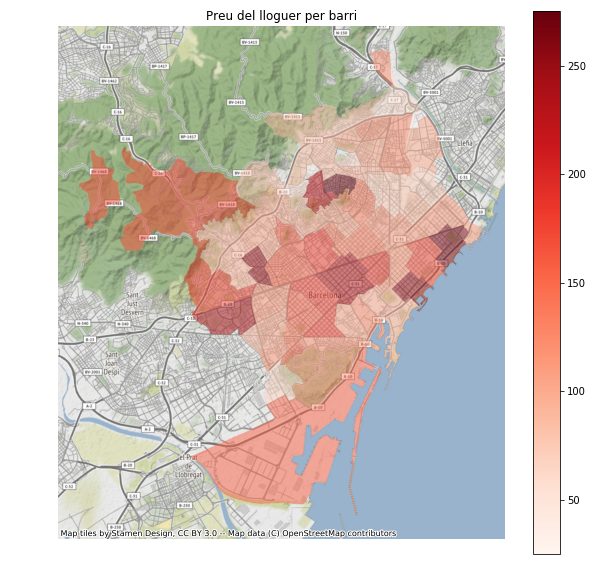

In [40]:
# Visualització preu lloguer
axe = neighbourhood.plot(figsize=(10, 10), alpha=0.5, column='preu', cmap='Reds', vmin=neighbourhood.preu.min(), vmax=neighbourhood.preu.max(), legend = True)
ctx.add_basemap(axe)
plt.title('Preu del lloguer per barri')
plt.axis('off')
plt.show()

Per aquells que us va agradar pensar noves solucions pel vostre problema, us proposo que doneu un cop d'ull al següent Kaggle!

https://www.kaggle.com/kritikseth/us-airbnb-open-data/tasks?taskId=2542&campaign=804ac1b0-8545-4bd6-a1ab-8bb2f0262f71